<a href="https://colab.research.google.com/github/josharsh/HelloML/blob/master/Classification/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import itertools


In [4]:
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2019-12-27 19:37:41--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  36.18K  --.-KB/s    in 0.03s   

2019-12-27 19:37:46 (1.36 MB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



In [0]:
df=pd.read_csv('teleCust1000t.csv')

In [9]:
df.head(20)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


In [8]:
df['region'].value_counts()

3    344
2    334
1    322
Name: region, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e6fb6c710>]],
      dtype=object)

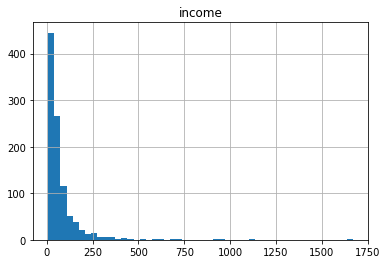

In [11]:
df.hist(column="income", bins=50)

In [12]:
X=df[['region','age','marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values
X[0:5]

array([[  2.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [13]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

In [14]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767,  0.18450456,  1.0100505 , -0.25303431, -0.12650641,
         1.0877526 , -0.5941226 , -0.22207644, -1.03459817, -0.23065004],
       [ 1.19883553, -0.69181243,  1.0100505 , -0.4514148 ,  0.54644972,
         1.9062271 , -0.5941226 , -0.22207644, -1.03459817,  2.55666158],
       [ 1.19883553,  0.82182601,  1.0100505 ,  1.23481934,  0.35951747,
        -1.36767088,  1.78752803, -0.22207644,  0.96655883, -0.23065004],
       [-0.02696767, -0.69181243, -0.9900495 ,  0.04453642, -0.41625141,
        -0.54919639, -1.09029981, -0.22207644,  0.96655883, -0.92747794],
       [-0.02696767, -0.93080797,  1.0100505 , -0.25303431, -0.44429125,
        -1.36767088, -0.89182893, -0.22207644, -1.03459817,  1.16300577]])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 10) (800,)
Test set: (200, 10) (200,)


In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [18]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([3, 3, 3, 2, 2])

In [19]:
y_test[0:5]

array([4, 1, 1, 2, 4])

In [20]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.54625
Test set Accuracy:  0.34


In [23]:
Ks = 4
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.23 , 0.305, 0.315])

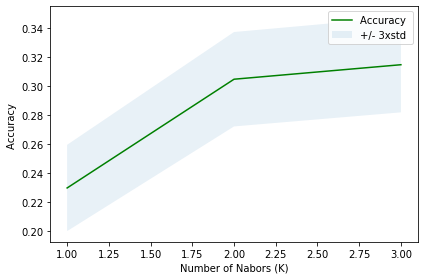

In [24]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()